# The Wild Card: The Impact of Vaccines on Covid-19 Death Rates

## Introduction: <br>
**LINKS/SOURCES:** <br>
- Github repository: https://github.com/uic-cs418/cs418-spring22-the-wild-card
- Covid Data: https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths
- Vaccination Data: https://covid19.who.int/data

In this project, we will be using Covid and Vaccine data from WHO and combine them to determine things about the covid data, such as how effective are the vaccines, which vaccines are the best, death rates per country based on vaccines given, etc... First, lets start by importing the necessary libraries for Data Analysis and Visualization. Then we will read both of the datasets into seperate DataFrames.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
vaccine = pd.read_csv("vaccination-data.csv")
#print(vaccine.head())

In [47]:
vaccine.head()
main.head()
main.tail()


,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
185092,2/17/2022,Zimbabwe,AFRO,350.0,232213.0,1.0,5379.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185093,2/18/2022,Zimbabwe,AFRO,385.0,232598.0,2.0,5381.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185094,2/19/2022,Zimbabwe,AFRO,432.0,233030.0,4.0,5385.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185095,2/20/2022,Zimbabwe,AFRO,194.0,233224.0,1.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185096,2/21/2022,Zimbabwe,AFRO,128.0,233352.0,0.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0


## Changes Made:

Now we will merge both of the datasets based on Country and WHO_REGION. This will give us a better way to understand both of the vaccine and Covid data better side-by-side.

In [3]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
# main.loc[:, "COUNTRY"].value_counts()
# main

In [4]:
main.loc[:, "COUNTRY"].value_counts()[0:5]          # There are a total of 789 dates for 237 countries
#main.head(10)

Afghanistan        781
Paraguay           781
Nigeria            781
Niue               781
North Macedonia    781
Name: COUNTRY, dtype: int64

Assumption 1: We changed the WHO_region and Country in **main** to match the WHO_REGION and COUNTRY in **vaccine**. <br>
Assumption 2: We will analyze/visualize data for 237 countries featured in the main dataset.

## Data Cleaning:

In [5]:
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])   # Cleaned Data
#print(main.head())

In [11]:
#print(main.head(150))

**NOTE:**<br>
We remove redundant/replicated data and put it in seperate Dataframes based on country (this includes the first_vaccine_date, number_vaccines_types_used and date_updated).

In [6]:
#make table for all first_vaccine_dates per country and get rid of it in the main dataset to have less duplicate redundant data
if 'FIRST_VACCINE_DATE' in main.columns:
    first_vaccine_dates = main[['COUNTRY', "FIRST_VACCINE_DATE"]]
    first_vaccine_dates = first_vaccine_dates.drop_duplicates()
    first_vaccine_dates['FIRST_VACCINE_DATE'] = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'])
if 'FIRST_VACCINE_DATE' in main.columns:
    main = main.drop(columns=['FIRST_VACCINE_DATE'])
if 'DATE_UPDATED' in main.columns:
    main = main.drop(columns=['DATE_UPDATED'])
first_vaccine_dates = first_vaccine_dates.sort_values(by='FIRST_VACCINE_DATE')

**NOTE:**<br>
We make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_cases, date repoted<br>

In [7]:
df= main[["COUNTRY","Date_reported", "Cumulative_cases"]]
#df[df.Cumulative_cases != 0].reset_index()

**NOTE:**<br>
We make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_deaths, date repoted<br>

In [8]:
dfCumDeaths= main[["COUNTRY","Date_reported","Cumulative_deaths"]]
#dfCumDeaths.head()
#dfCumDeaths[dfCumDeaths.Cumulative_deaths!=0].reset_index()
print(main.head())

  Date_reported      COUNTRY WHO_REGION  New_cases  Cumulative_cases  \
0      1/3/2020  Afghanistan       EMRO        0.0               0.0   
1      1/4/2020  Afghanistan       EMRO        0.0               0.0   
2      1/5/2020  Afghanistan       EMRO        0.0               0.0   
3      1/6/2020  Afghanistan       EMRO        0.0               0.0   
4      1/7/2020  Afghanistan       EMRO        0.0               0.0   

   New_deaths  Cumulative_deaths  TOTAL_VACCINATIONS  \
0         0.0                0.0           5535254.0   
1         0.0                0.0           5535254.0   
2         0.0                0.0           5535254.0   
3         0.0                0.0           5535254.0   
4         0.0                0.0           5535254.0   

   PERSONS_VACCINATED_1PLUS_DOSE  TOTAL_VACCINATIONS_PER100  \
0                      4907058.0                     14.219   
1                      4907058.0                     14.219   
2                      4907058.0         

## DATA CLEANED AFTER PRESENTATION

In [23]:
main.info

<bound method DataFrame.info of        Date_reported      COUNTRY WHO_REGION  New_cases  Cumulative_cases  \
0           1/3/2020  Afghanistan       EMRO        0.0               0.0   
1           1/4/2020  Afghanistan       EMRO        0.0               0.0   
2           1/5/2020  Afghanistan       EMRO        0.0               0.0   
3           1/6/2020  Afghanistan       EMRO        0.0               0.0   
4           1/7/2020  Afghanistan       EMRO        0.0               0.0   
...              ...          ...        ...        ...               ...   
185092     2/17/2022     Zimbabwe       AFRO      350.0          232213.0   
185093     2/18/2022     Zimbabwe       AFRO      385.0          232598.0   
185094     2/19/2022     Zimbabwe       AFRO      432.0          233030.0   
185095     2/20/2022     Zimbabwe       AFRO      194.0          233224.0   
185096     2/21/2022     Zimbabwe       AFRO      128.0          233352.0   

        New_deaths  Cumulative_deaths  TOTA

In [24]:
# removing null values
main['TOTAL_VACCINATIONS'] = main['TOTAL_VACCINATIONS'].fillna(0.0)
main['PERSONS_VACCINATED_1PLUS_DOSE '] = main['PERSONS_VACCINATED_1PLUS_DOSE'].fillna(0.0)
main['TOTAL_VACCINATIONS_PER100'] = main['TOTAL_VACCINATIONS_PER100'].fillna(0.0)
main['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] = main['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].fillna(0.0)
main['PERSONS_FULLY_VACCINATED'] = main['PERSONS_FULLY_VACCINATED'].fillna(0.0)
main['VACCINES_USED'] = main['VACCINES_USED'].fillna("NONE")
main['NUMBER_VACCINES_TYPES_USED'] = main['NUMBER_VACCINES_TYPES_USED'].fillna(0.0)
main['PERSONS_FULLY_VACCINATED_PER100'] = main['PERSONS_FULLY_VACCINATED_PER100'].fillna(0.0)
main['PERSONS_VACCINATED_1PLUS_DOSE'] = main['PERSONS_VACCINATED_1PLUS_DOSE'].fillna(0.0)

In [26]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185097 entries, 0 to 185096
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Date_reported                         185097 non-null  object 
 1   COUNTRY                               185097 non-null  object 
 2   WHO_REGION                            185097 non-null  object 
 3   New_cases                             185097 non-null  float64
 4   Cumulative_cases                      185097 non-null  float64
 5   New_deaths                            185097 non-null  float64
 6   Cumulative_deaths                     185097 non-null  float64
 7   TOTAL_VACCINATIONS                    185097 non-null  float64
 8   PERSONS_VACCINATED_1PLUS_DOSE         185097 non-null  float64
 9   TOTAL_VACCINATIONS_PER100             185097 non-null  float64
 10  PERSONS_VACCINATED_1PLUS_DOSE_PER100  185097 non-null  float64
 11  

In [37]:
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.850970e+05,185097.000000,185097.000000,1.850970e+05
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474,4.464327e+07,2.068322e+07,115.303156,51.560481,1.824990e+07,46.307333,3.670886,2.068322e+07
std,1.571867e+04,2.774388e+06,166.263364,49849.100062,2.362618e+08,1.064696e+08,75.239091,29.636667,9.687399e+07,28.347616,2.091105,1.064696e+08
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,1.290000e+02,0.000000,1.000000,2.191050e+05,8.898300e+04,48.153000,28.755000,8.040900e+04,17.182000,2.000000,8.898300e+04
50%,2.100000e+01,8.577000e+03,0.000000,122.000000,2.353567e+06,1.255300e+06,123.687000,59.028000,1.030133e+06,50.244000,4.000000,1.255300e+06
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000,1.591652e+07,7.456361e+06,174.862000,76.305000,6.102186e+06,70.955000,5.000000,7.456361e+06
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000,3.094069e+09,1.276287e+09,334.116000,123.787000,1.235535e+09,121.219000,11.000000,1.276287e+09


In [43]:
main.tail()

,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
185092,2/17/2022,Zimbabwe,AFRO,350.0,232213.0,1.0,5379.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185093,2/18/2022,Zimbabwe,AFRO,385.0,232598.0,2.0,5381.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185094,2/19/2022,Zimbabwe,AFRO,432.0,233030.0,4.0,5385.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185095,2/20/2022,Zimbabwe,AFRO,194.0,233224.0,1.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185096,2/21/2022,Zimbabwe,AFRO,128.0,233352.0,0.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0


[Text(0.5, 1.0, 'MISSING VALUES IN THE DATASET')]

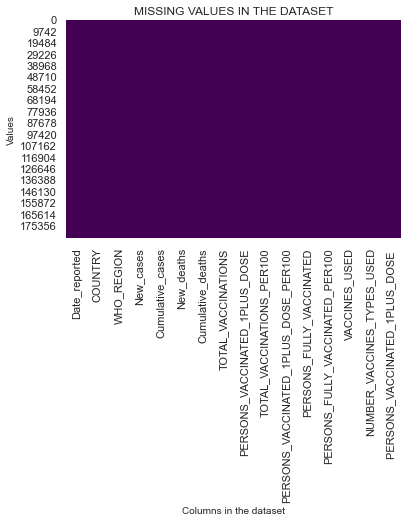

In [57]:
plot= sns.heatmap(main.isnull(),cbar=False,cmap='viridis')
plot.set_xlabel("Columns in the dataset", fontsize = 10)
plot.set_ylabel("Values", fontsize = 10)
plot.set(title= "MISSING VALUES IN THE DATASET")

## Exploratory Data Analysis:

In [27]:
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.850970e+05,185097.000000,185097.000000,1.850970e+05
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474,4.464327e+07,2.068322e+07,115.303156,51.560481,1.824990e+07,46.307333,3.670886,2.068322e+07
std,1.571867e+04,2.774388e+06,166.263364,49849.100062,2.362618e+08,1.064696e+08,75.239091,29.636667,9.687399e+07,28.347616,2.091105,1.064696e+08
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,1.290000e+02,0.000000,1.000000,2.191050e+05,8.898300e+04,48.153000,28.755000,8.040900e+04,17.182000,2.000000,8.898300e+04
50%,2.100000e+01,8.577000e+03,0.000000,122.000000,2.353567e+06,1.255300e+06,123.687000,59.028000,1.030133e+06,50.244000,4.000000,1.255300e+06
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000,1.591652e+07,7.456361e+06,174.862000,76.305000,6.102186e+06,70.955000,5.000000,7.456361e+06
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000,3.094069e+09,1.276287e+09,334.116000,123.787000,1.235535e+09,121.219000,11.000000,1.276287e+09


In [28]:
main.head()

,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
0,1/3/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0,4907058.0
1,1/4/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0,4907058.0
2,1/5/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0,4907058.0
3,1/6/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0,4907058.0
4,1/7/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0,4907058.0


In [29]:
main.tail()

,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_VACCINATED_1PLUS_DOSE
185092,2/17/2022,Zimbabwe,AFRO,350.0,232213.0,1.0,5379.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185093,2/18/2022,Zimbabwe,AFRO,385.0,232598.0,2.0,5381.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185094,2/19/2022,Zimbabwe,AFRO,432.0,233030.0,4.0,5385.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185095,2/20/2022,Zimbabwe,AFRO,194.0,233224.0,1.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0
185096,2/21/2022,Zimbabwe,AFRO,128.0,233352.0,0.0,5386.0,7841837.0,4347329.0,52.761,29.249,3381046.0,22.748,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...",4.0,4347329.0


In [34]:
main.isnull().sum()

Date_reported                           0
COUNTRY                                 0
WHO_REGION                              0
New_cases                               0
Cumulative_cases                        0
New_deaths                              0
Cumulative_deaths                       0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           0
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    0
PERSONS_FULLY_VACCINATED                0
PERSONS_FULLY_VACCINATED_PER100         0
VACCINES_USED                           0
NUMBER_VACCINES_TYPES_USED              0
PERSONS_VACCINATED_1PLUS_DOSE           0
dtype: int64

In [35]:
for col in main.columns:
    print('{} : {}'.format(col,main[col].unique()))

Date_reported : ['1/3/2020' '1/4/2020' '1/5/2020' '1/6/2020' '1/7/2020' '1/8/2020'
 '1/9/2020' '1/10/2020' '1/11/2020' '1/12/2020' '1/13/2020' '1/14/2020'
 '1/15/2020' '1/16/2020' '1/17/2020' '1/18/2020' '1/19/2020' '1/20/2020'
 '1/21/2020' '1/22/2020' '1/23/2020' '1/24/2020' '1/25/2020' '1/26/2020'
 '1/27/2020' '1/28/2020' '1/29/2020' '1/30/2020' '1/31/2020' '2/1/2020'
 '2/2/2020' '2/3/2020' '2/4/2020' '2/5/2020' '2/6/2020' '2/7/2020'
 '2/8/2020' '2/9/2020' '2/10/2020' '2/11/2020' '2/12/2020' '2/13/2020'
 '2/14/2020' '2/15/2020' '2/16/2020' '2/17/2020' '2/18/2020' '2/19/2020'
 '2/20/2020' '2/21/2020' '2/22/2020' '2/23/2020' '2/24/2020' '2/25/2020'
 '2/26/2020' '2/27/2020' '2/28/2020' '2/29/2020' '3/1/2020' '3/2/2020'
 '3/3/2020' '3/4/2020' '3/5/2020' '3/6/2020' '3/7/2020' '3/8/2020'
 '3/9/2020' '3/10/2020' '3/11/2020' '3/12/2020' '3/13/2020' '3/14/2020'
 '3/15/2020' '3/16/2020' '3/17/2020' '3/18/2020' '3/19/2020' '3/20/2020'
 '3/21/2020' '3/22/2020' '3/23/2020' '3/24/2020' '3/25/2020'

## Visualization:

# Visulatization: Understanding the Severity of COVID-19 Pandemic
Before starting any ML technique I wanted to create a visuals which will depict the severity of the COVID-19 Pandemic. WHO Dataset consits of a variety of countries and their respective reports starting year 2021 to 2022. My visulalization only focuses on the data reported for the United States to America. The main data was was broken into sub datasets for columns 'Country', 'Cumulative_cases', 'Cumulative_deaths' and 'Date_reported' (Can be seen under data cleaning). <br>
**INFERENCE:** <br>
United States of America started reporting Covid-19 cases during year 2020 and drastically started rising after Jan 2021. From this visual one can clearly make out the fact that COVID-19 surged the most during the year 2021. Since in the line plot there is no retardation, it proves the need to contain the pandemic and prepare treatment for countering the virus.

In [11]:
# Considering only United States of America
import datetime
from datetime import date
dfUSA= df[df['COUNTRY']== 'United States of America']
usa=dfUSA[dfUSA.Cumulative_cases!=0].reset_index()
#usa.head()
#usa.tail() #763

In [12]:
usa['Date_reported']=pd.date_range(start='1/20/2020',end='2/21/2022',freq='D')
usa['Date_reported']= pd.to_datetime(df['Date_reported'])
#usa=usa[0:763]
#print(usa.head(10))
#print(usa.tail())
usa.describe()

,index,Cumulative_cases
count,764.000000,7.640000e+02
mean,176904.500000,2.405770e+07
std,220.692093,2.045222e+07
min,176523.000000,1.000000e+00
25%,176713.750000,4.353821e+06
50%,176904.500000,2.642901e+07
75%,177095.250000,3.632055e+07
max,177286.000000,7.772948e+07


Text(0, 0.5, 'Cumulative Cases (In 10 Millions)')

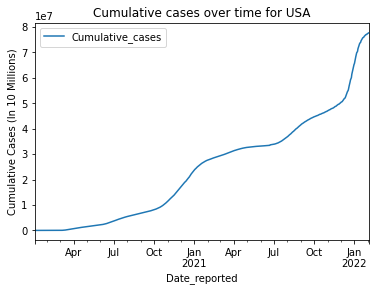

In [13]:
ax = usa.plot.line(x='Date_reported', y='Cumulative_cases', title="Cumulative cases over time for USA")
ax.set_ylabel("Cumulative Cases (In 10 Millions)")

## Visualization: How new cases were effected after the first vaccinations were released 
What I did in this visualization was to take 2 different countries (of similar population/size), one which had gotten vaccines and another one that hasn't. After checking the unvaxxed and vaxxed tables, I decided to compare Japan and Russia, which have about a 20 million difference in populations. I then plotted the amount of new cases 6 months before and after the first vaccination date of the vaccinated country to show a comparison on how vaccinated countries' cases differ from the unvaccinated one.

In [14]:
import datetime

vaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == False]
unvaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == True]

#1 vaccinated Country (Japan) and 1 unvaccinated Country (Russia)
subData3 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Russian Federation'])
subData4 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Japan'])

first_vax_date = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'].loc[first_vaccine_dates['COUNTRY'] == 'Japan'].values)

subData3['Date_reported'] = pd.to_datetime(subData3['Date_reported'])
subData4['Date_reported'] = pd.to_datetime(subData4['Date_reported'])

start_date = '2020-10-17'
end_date = '2021-10-17'

mask3 = (subData3['Date_reported'] > start_date) & (subData3['Date_reported'] <= end_date)
mask4 = (subData4['Date_reported'] > start_date) & (subData4['Date_reported'] <= end_date)

subData3 = subData3[mask3]
subData4 = subData4[mask4]

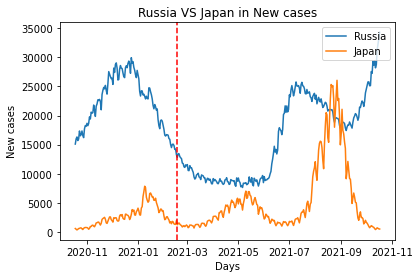

In [15]:
import seaborn as sns

fig = plt.figure()

for frame in [subData3, subData4]:
    plt.plot(frame['Date_reported'], frame['New_cases'])
#Get the first vaccination date for USA

#plot the first vaccination date on the graph
plt.axvline(first_vax_date, color="red", linestyle="--")
plt.legend(["Russia", "Japan"], loc ="upper right")
plt.title("Russia VS Japan in New cases")
plt.ylabel("New cases")
plt.xlabel("Days")
plt.show()

As shown in the plot, Japan got their first vaccines on 02-17-2021 and Russia did not get their first vaccines. From this plot, we can see that Japan (the vaccinated country) had consolidated in new cases at about 7,500 before having a drastic increase and drastic decrease shortly after. Russia had slight decreases but ended up with record-breaking new cases at the end, whereas Japan had near record-breaking low cases at the end. This shows that vaccines may have an effect on decreasing new cases in the long-term.

## Visualization : The total number of cases and deaths in various WHO Regions

A dataframe had to be created using the relevant coulumns, which in this case are the WHO Regions, the cumulative cases and deaths. The dataframe is grouped on the regions and then converted to a longform format, making it easier for plotting.

In [16]:
import seaborn as sns
sns.set_theme()


region_and_cases = main[['WHO_REGION', 'Cumulative_cases', 'Cumulative_deaths']]
region_and_cases = region_and_cases.groupby(['WHO_REGION']).max().reset_index()

df = pd.melt(region_and_cases, id_vars="WHO_REGION", var_name = 'Cases_and_Deaths', value_name = 'Value')
#print(df)

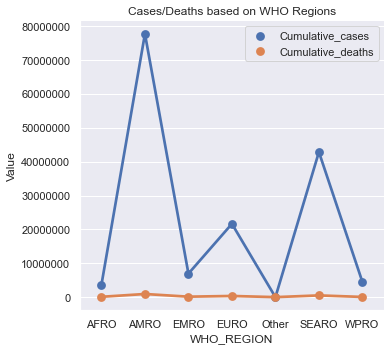

In [17]:
sns.catplot(data = df, x = "WHO_REGION", y = 'Value', hue = 'Cases_and_Deaths', ci = 'sd', kind = 'point', legend = False)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
plt.title("Cases/Deaths based on WHO Regions")
plt.legend()
plt.show()

The aim of this visulaization is to find if there are any inconsistencies in total number of cases and the total number of deaths in a region. From the point-plot it is easy to see that the regions with highest number of total reported cases have the highest total reported deaths. The only thing that is inconsistent is the __ratio of deaths to the total cases for AFRO region is twice as much as that for any other region__.

## Visualization

I wanted to see how each region are doing on vaccinations, and how we can make a guess on how COVID is impacting these regions in the world. I am looking at the WHO_REGION and TOTAL_VACCINATIONS in the dataset.

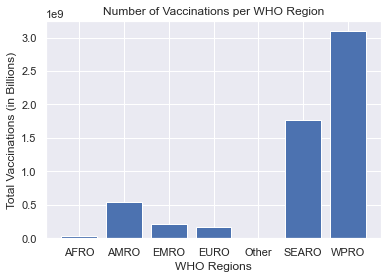

In [18]:
region_vax = main[['WHO_REGION', 'TOTAL_VACCINATIONS']]
region_vax = region_vax.groupby(['WHO_REGION']).max().reset_index()
#print(region_vax)

plt.bar(region_vax['WHO_REGION'], region_vax['TOTAL_VACCINATIONS'])
plt.title('Number of Vaccinations per WHO Region')
plt.xlabel('WHO Regions')
plt.ylabel('Total Vaccinations (in Billions)')
plt.show()

**Inference:**
From this visualization we see the distribution and difference of vaccinations in WHO regions. SEARO (South East Asia) and WPRO (Western Pacific) have the majority of vaccinations while AMRO (Americas), EMRO (Eastern Mediterranean), and EURO (Europe) are lagging behind. AFRO (African Region) has the least amount of vaccinations. From this, we can make a connection to how these various regions and countries are handling COVID cases.

## Machine Learning Analysis:

The aim of this ML Analysis is to perform a regression task on a subset of our main dataset. The subset includes the number of cases and deaths as reported by the the regions to WHO.

We will use the regression task to predict new cases based on the the older cases and other features of the dataset.

In [20]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = main[main.columns[0:7]]

target = df['New_deaths']


l = LabelEncoder()
df['WHO_REGION'] = l.fit_transform(df['WHO_REGION'])
new_df = df.drop(columns = ['New_deaths', 'COUNTRY', 'Date_reported'])
#new_df

C:\Users\shamb\AppData\Local\Temp/ipykernel_7000/2649080630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHO_REGION'] = l.fit_transform(df['WHO_REGION'])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)


predict = reg.predict(X_test)
rmse = mean_squared_error(y_test, predict, squared = False)
mae = mean_absolute_error(y_test, predict)

print("The mean absolute error is", mae)
print('The root mean squred error is', rmse)

The mean absolute error is 27.266108998172783
The root mean squred error is 116.933537459034


In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)


predict = reg.predict(X_test)
rmse = mean_squared_error(y_test, predict, squared = False)
mae = mean_absolute_error(y_test, predict)

print("The mean absolute error is", mae)
print('The root mean squred error is', rmse)

The mean absolute error is 26.881460118929095
The root mean squred error is 111.36431811639913


As we see for liner regression task the mean absolute error gives a lower value than root mean squared error and thus it is a better metric for this task.

For future Machine Learning tasks we will work with the full dataset and try to find the if we can accuractely predict the new deaths when the number of vaccinations are taken into account. We would also like to have a classification task that can help us classify the types of vaccines given in a particular region.